# Objekt-orientierte Programmierung
### Angewandte Systemwissenschaften I
#### Python - Wonderland

# Semesterplan
---

1.  0. Anaconda und Pip
    1. Einführung in Python
    2. Matplotlib & Jupyter-Notebooks: Eine Einführung ins Wonderland - Modell
2.  1. Python-Pakete und Workflow
    2. Funktionale Programmierung & Python-Module
3.  1. Agenten-basierte Modellierung
    2. **Objekt-orientierte Programmierung**
4.  Projektpräsentationen

## Inhalt
+ Objekt-orientierte Programmierung
+ Python als objekt-orientierte Programmiersprache
+ Duck-typing
+ Abstrakte Basis-Klassen
+ Die richtige ABC finden
+ Argumente und Schlüsselwort-Argumente
+ Tuples als Records

## Objekt-orientierte Programmierung

Wir **denken** über die Welt in der wir Leben hauptsächlich **in Form von Objekten**. <br>
Dieser Denkansatz kann uns auch dabei helfen, Programme **übersichtlicher** und **leichter <br>
verständlich** zu gestalten.

Ein **Objekt** kann dabei einen **Zustand** (Attribute) haben und **Methoden** welche diesen Zustand verändern können. <br>
Zum Beispiel ist ein **Automat** ein Objekt, sein Zustand ist der **Inhalt** und die Methode **Schokoladenriegel herausgeben** kann diesen verändern. 

*Manche Objekte dienen auch nur **als Speicher** für einen Zustand.* <br>
*Andere wiederum können nur eine **Sammlung von Funktionen** sein.*

## Erben und Vererben

Eine **Klasse** beschreibt den **Bauplan** für ihre Objekte. Sie kann dabei von anderen Klassen **erben**. <br>
Das heißt, dass sie die **Methoden** und **Attribute** (=Zustand) ihrer Vorfahren **übernehmen**.

Außerdem kann die Klasse auch an andere **vererben** indem diese sich entscheiden von ihr zu erben.

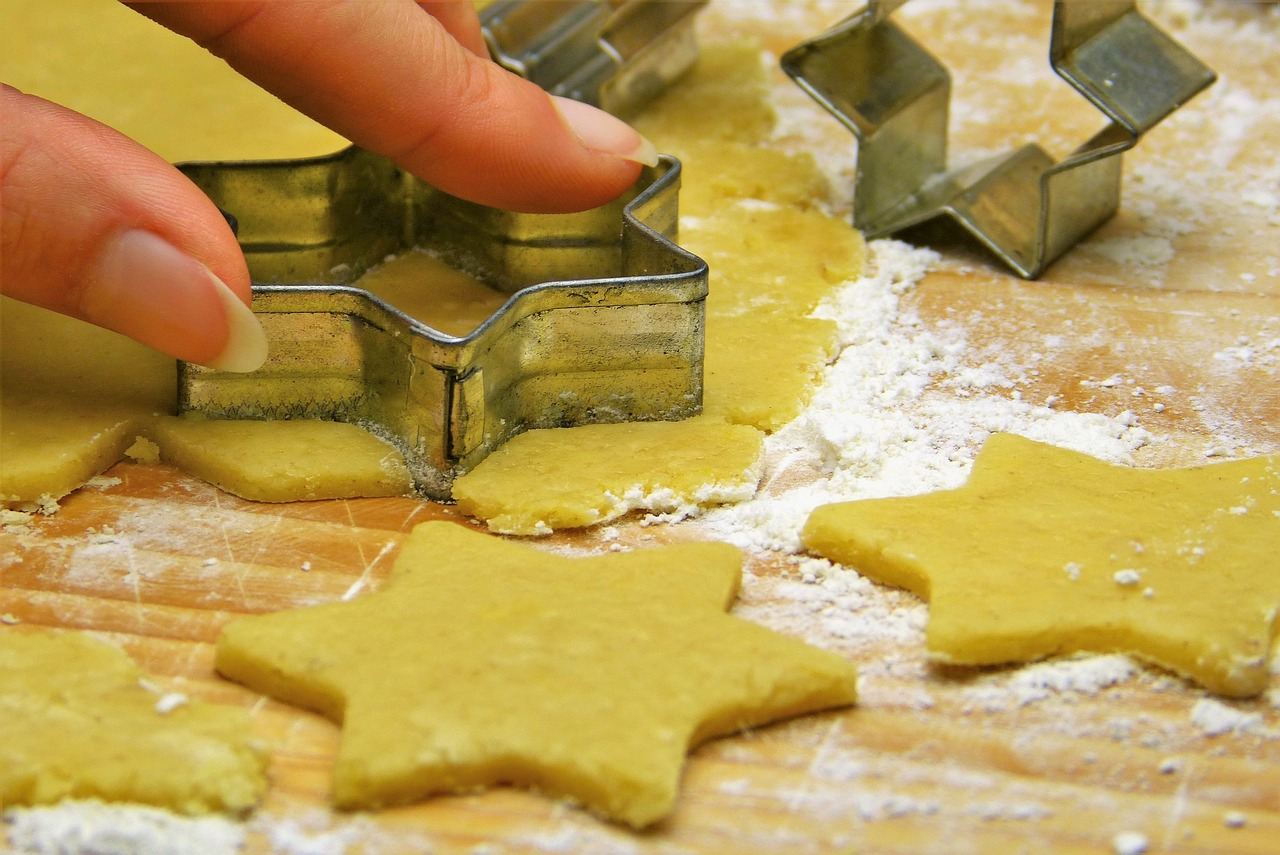

## UML eine Sprache für OOP

Um diese **Verwandtschaftsverhältnisse** korrekt darzustellen, wurde eine grafische Sprache entwickelt. <br>
Die Unified Modeling Language beschreibt Klassen, deren Methoden und Attribute und deren Verhältnis zueinander.

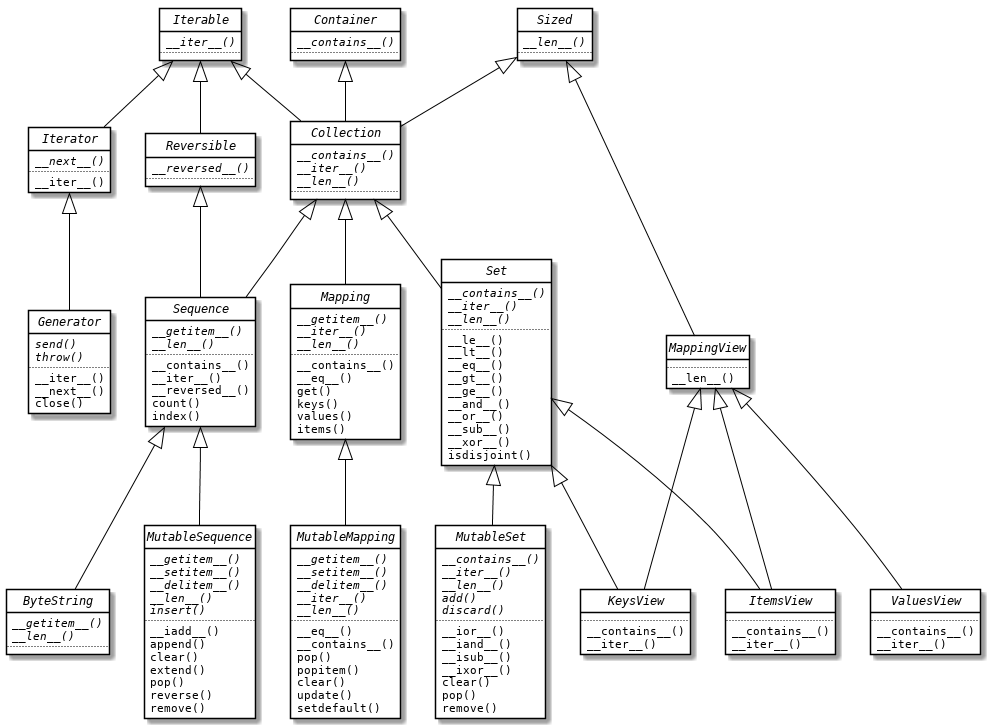

## Python als objekt-orientierte Programmiersprache

Python wurde **ursprünglich** als **interpretierte, interaktive, objekt-orientierte** Programmiersprache entworfen. <br> Schon ihre Vorgängerin ABC war eine **OO** Sprache.

**Objekte** in Python, folgen einem Bauplan. Dieser wird als **Klasse** bezeichnet wird und mit dem **Schlüsselwort** ```class``` definiert wird. <br> Danach folgt der **Name** der Klasse mit dem ersten Buchstaben groß:

In [43]:
class Agent:
    pass

Ein **Objekt** dieser Klasse kann man nun **initialisieren** indem man die Klasse, ähnlich einer Funktion, aufruft:

In [45]:
an_agent = Agent()
an_agent

Das Objekt ```an_agent``` besitzt nur eine **ID**, wie können wir ihm nun einen Inhalt geben?

## Python-Objekte mit Zustand

Um einem Python-Objekt einen Zustand zuzuweisen, lassen wir es bei der **Initialisierung** auf sich selbst zugreifen. Dazu verweisen wir auf ```self```. <br>
Dieses ```self``` ist das **erste Argument jeder Methode**. Das heißt aber auch, wir können **nur innerhalb einer Methode** auf ```self``` zugreifen.

Eine ganz **spezielle Methode** ist ```__init__```. Diese **wird immer bei der Initialisierung aufgerufen**. <br>
```__init__``` ist also der richtige Ort um den **Zustand** unseres Objekts zu definieren.

In [81]:
class Agent:
    def __init__(self, state):
        self.state = state

Initialisieren wir nun ein neues **Objekt** der Klasse ```Agent``` geht das nur, indem wir ihm auch einen Zustand überreichen:

In [82]:
james_bond = Agent('Gut')
james_bond.state

'Gut'

Wie wir sehen sind die **Argumente** der Methode ```__init__``` automatisch die **Initialisierungs - Argumente** der Objekte der Klasse ```Automat```.

## Methoden

**Einfach Änderungen** an einem Python - Objekt können wir **direkt vornehmen**:

In [148]:
print(james_bond.state)
james_bond.state = 'Schlecht'
print(james_bond.state)

Gut
Schlecht


**Komplexere** Vorgänge am Objekt, sind in einer Methode besser aufgehoben.

Mit ```__init__``` haben wir bereits eine Methode kennengelernt. **Andere Methoden** funktionieren nach dem **gleichen Schema**. <br>
Ihr **erstes Argument** nennen wir immer ```self```, danach folgen die weiteren Argumente.

In [149]:
class Agent:
    def __init__(self, food):
        self.food = 0
        self.buy(food)
        
    def eat(self):
        self.food -= 1
        
    def buy(self, amount):
        self.food += int(amount)

Abgesehen vom Argument ```self``` zum Beginn, unterscheiden sich Methoden nicht sehr von Funktionen. <br>
**Wichtig:** Es ist Konvention, dass eine Funktion welche den Zustand ändert mit ```return None``` endet.

## Testen unserer Agenten-Klasse

Wir **initialisieren** ein Objekt unserer neuen Klasse ```Agent``` welches *3 Riegel* beinhält und maximal *5* halten kann:

In [150]:
chicken = Agent(3)

In [153]:
print(chicken.food)
chicken.buy(4)
print(chicken.food)

1
5


## Special methods

Special methods sind wie auch ```__init__``` von jeweils **zwei Unterstrichen** je Seite benannt.

In [155]:
class Special:
    def __str__(self):
        return "Wow!"

In [157]:
s = Special()
str(s)

'Wow!'

## Erben

Eine Klasse von Objekten kann die **Eigenschaften** einer anderen Klasse **erben**. Dazu schreiben wir die **vererbende Klasse in Klammern** zur Klassendefinition:

In [121]:
class Sheep(Agent):
    def __init__(self, color, food):
        self.food = int(food)
        self.color = str(color)

Ein ```Sheep``` Agent besitzt **alle Methoden und Attribute** die schon ```Agent``` besessen hatte.

In [158]:
a_sheep = Sheep('Grün', 2)

In [160]:
print(a_sheep.color, a_sheep.food)
a_sheep.buy(4)
print(a_sheep.color, a_sheep.food)

Grün 1
Grün 5


<div class="alert alert-block alert-info">
<h3>Tipp: @staticmethod</h3>
    
Wollen wir eine Funktion einer Klasse unterordnen ohne dass ihr erstes Argument <code>self</code> sein soll, schreiben wir den <strong>Dektorator</strong> <code>@staticmethod</code> über diese Funktion. <br>
<code>addiere</code> verhält sich also wie eine <strong>ganz normale Funktion</strong>. Sie ist allerdings nur auf der <strong>Klasse selbst</strong> und auf <strong>Objekten der Klasse</strong> aufrufbar.
</div>

In [161]:
class Sheep(Agent):
    def __init__(self, color, food):
        self.food = int(food)
        self.color = str(color)
                
    @staticmethod
    def addiere(a,b):
        return a + b

In [162]:
a_sheep = Sheep("Rot", 3)
a_sheep.addiere(1,2)

3

In [163]:
Sheep.addiere(1,2)

3

<div class="alert alert-block alert-info">
<h3>Tipp: @classmethod</h3>
    
Eine Klassen-Methode bekommt als erstes Argument die <strong>Klasse</strong> selbst und nicht das Objekt! <br>
Damit kann man zum Beispiel auf der Klasse einen zweiten Objektkonstruktor aufbauen:
</div>

In [164]:
class AgentPlus(Agent):
    @classmethod
    def from_string(cls, string):
        args = string.split()
        return cls(*args) # der Stern entpackt das Tuple: Aus cls((1, 2)) wird cls(1, 2)

In [167]:
agent_from_string = AgentPlus.from_string("4")
agent_from_string.food

4

## Mehrfache Abstammungen

In Python ist es möglich, **von mehreren Klassen zu erben**. <br>
Dazu trennt man diese Klassen mit einem Beistrich:

In [175]:
class SheepPlus(Sheep, AgentPlus):
    pass

a = SheepPlus('Grün', 3)
b = SheepPlus.from_string("Blau 2")

b.addiere(1,2)

3

Wie wir sehen erbt ```SheepPlus``` von seinen beiden 'Vorfahren' jeweils deren Methoden. <br>
Ein solcher Automat besitzt also ```addiere``` und ```from_string```.

### Abstammungskonflikte

Was passiert aber, wenn mehrere **Klassen** von denen wir erben eine **Methode mit demselben Namen** besitzen? <br>
Objekte der Klasse ```Kawumm``` sollen von den drei Klassen ```A```, ```B``` und ```C``` erben:

In [177]:
class A:
    def bingo(self):
        print("Bingo!")
    
class B:
    def bongo(self):
        print("Bongo!")
        
class C:
    def bongo(self):
        print("BongoBong!")
        
class Kawumm(A,B,C):
    def __init__(self):
        self.bingo()
        self.bongo()

Was passiert wenn wir ein ```Kawumm``` - Objekt initialisieren?

In [178]:
Kawumm()

Bingo!
Bongo!


Es wird die Methode ```bongo``` welche in ```B``` definiert wurde aufgerufen!
```Kawumm```s erben diese also von ```B```, nicht von ```C```. 

Das liegt an der **Ordnung der Abstammung**!

Eigenschaften von Vorfahren welche **früher erwähnt** werden, verhalten sich **dominant**. <br>
In der Definition ```class Kawumm(A,B,C):``` folgt ```C``` auf ```B```, ```C.bongo``` verhält sich also rezessiv.

Die Ordnung lässt sich leicht feststellen, indem man das ```__mro__``` - Attribut einer Klasse betrachtet:

In [16]:
Kawumm.__mro__

(__main__.Kawumm, __main__.A, __main__.B, __main__.C, object)

<div class="alert alert-block alert-info">
<h3>Tipp: Namenskonflikte vermeiden mit Pythons Name - Mangling</h3>
  <p>  
Wir haben bereits die Bedeutung des <strong>Unterstrich</strong>s (Underscores) <code>_</code> in Python einige Male gestreift. Er ist vor allem bei der Definition von Klassen wichtig! 
    </p>
    <p>
<ul>
<li>Wollen wir, dass auf Methoden oder Attribute von Objekten unserer Klasse nicht im Nachhinein zugegriffen werden kann, so setzen wir <strong>einen Unterstrich</strong> an den <strong>Beginn des Namens</strong>. <br>
Wir bezeichnen eine solche Methode oder ein solches Attribut als <strong><i>protected</i></strong>.</li>

<li>Spezielle Methoden (<strong><i>special methods</i></strong>) in Python haben <strong>zwei führende</strong> und <strong>zwei folgende</strong> Unterstriche im Namen. Solche Methoden sollen wir nicht selbst erschaffen, sondern sind da um <strong>überschrieben</strong> zu werden, falls wir ein <strong>Protokoll implementieren</strong> wollen.</li>


<li>Aber Unterstriche helfen auch <strong>Namenskonflikte zu vermeiden</strong>. Setzen wir <strong>zwei oder mehr führende</strong> aber <strong>nicht mehr als einen folgenden</strong> Unterstrich, so <strong>ändert Python später diesen Namen</strong>! </li>
</ul>
</p>
<p>
Aus <code>__methode</code> wird dann <code>_Klasse__methode</code> und sollte nicht mehr überschrieben werden. Wir bezeichnen solche Methoden oder Attribute als <strong><i>private</i></strong>.
    </p>
</div>

In [184]:
class Mangle:
    _protected = 'Bla'
    __mangled = 'Test' # private Variable
    
    def f(self):
        return self.__mangled
    
dir(Mangle())[0] 

('_Mangle__mangled', 'Test')

## Ducktyping

Sogenannte **Protokolle** sind **informelle** Beschreibungen von Klassen. Sie geben vor, welche **Methoden** eine Klasse besitzen muss, um dem Protokoll **zugehörig zu sein**.

Zum Beispiel reicht es, die Methoden ```__len__``` und ```__getitem__``` in einer Klasse zu integrieren, um sie dem **```sequence``` - Protokoll** zu unterwerfen. <br>
Objekte einer solchen Klasse sind dann durch ```for``` - Schleifen bearbeitbar, es können ```slice```s herausgeschnitten werden und vieles mehr!

> "*If it walks like a duck and it quacks like a duck, then it must be a duck*"

## Eine Kollektion für Simulationsergebnisse

Ergebnisse einer Simulation sollten in einer ```for``` Schleife durch-**iterierbar** sein. In einer Liste können verherige **Simulationsschritte** aber versehentlich **überschrieben** werden. Das wollen wir **verhindern**.

Also nutzen wir **Ducktyping** um eine eigene Klasse ```Environment``` für die Zustände unseres ABMs zu schaffen.

In [199]:
class Environment:
    """Environment of our ABM"""
    def __init__(self):
        self._storage = list()

    def __len__(self):
        return len(self._storage)

    def __getitem__(self, index):
        return self._storage[index]
    
    def store(self, agent):
        """Appends an agent state to the storage"""
        self._storage.append(agent.food)

In Objekte dieser Klasse kann man nur einen Zustand speichern. Um mehr hinzufügen zu können, geben wir der Klasse eine Methode ```store```

<div class="alert alert-block alert-info">
<h3>Tipp: Richtiges Ducktyping</h3>
<p>   
Wird <code>__getitem__</code> aufgerufen obwohl es kein Element mit dem übergebenen <code>index</code> gibt, so <strong>muss</strong> ein <code>IndexError</code> ausgerufen werden! <br>
Dies ist <strong><a href="https://docs.python.org/3/reference/datamodel.html#object.__getitem__">in der Spezifikation</a></strong> des Protokolls genau so geregelt.
    </p>
    <p>
Deshalb ist es besonders wichtig, sich beim Ducktyping immer exakt <strong>an die Vorgaben des Protokolls zu halten!</strong>
    </p>
</div>

In [203]:
env = Environment()
env.store(chicken)
chicken.eat()
env.store(chicken)

## Abstrakte Basis-Klassen (ABCs)

Da es vorkommen kann, dass Klassen zwar **Methoden mit dem gleichen Namen** haben, diese **aber gar nicht verwandt** sind, ist es nützlich sie als Abkömmlinge einer ABC zu **registrieren**. <br>
Pythons eingebaute ABCs findet man im Paket [```collections.abc```](https://docs.python.org/3/library/collections.abc.html):

In [213]:
import collections.abc

Für manche ABCs reicht es dennoch, nur die passende Methode implementiert zu haben. So weißt die Methode ```__len__``` unsere ```ergebnisse``` als Instanz von ```collections.abc.Sized``` aus:

In [214]:
isinstance(env, collections.abc.Sized)

True

Trotz der zusätzlichen Methode ```__getitem__``` welche dem ```Sequence``` - Protokoll entspricht, ist sie allerdings keine Instanz von ```collections.abc.Sequence```:

In [215]:
isinstance(env, collections.abc.Sequence)

False

Um Objekte unserer ```Environment``` - Klasse zur Instanz von ```collections.abc.Sequence``` zu machen, müssen wir **explizit von der ABC erben** oder sie mit ```collections.abc.Sequence.register``` **registrieren**.

In [216]:
collections.abc.Sequence.register(Environment)

__main__.Environment

In [217]:
isinstance(env, collections.abc.Sequence)

True

In [218]:
class Environment(Environment, collections.abc.Sequence):
    pass

<div class="alert alert-block alert-info">
<h3>Tipp: Der Versuchung eigener ABCs widerstehen</h3>
<p>  
Python bietet in seiner <strong>Standardbibliothek</strong> genug ABCs um <strong>fast alle glücklich</strong> zu machen. Deshalb ist es <strong>keine gute Praxis</strong> einfach selbst ABCs zu erstellen. <br>
Stattdessen sollte man die bereits definierten <strong>ABCs durchstöbern</strong> um die passende(-n) Klassen zu finden!
    </p>
<p>
Für alle Formen von <strong>Kollektionen</strong> findet man die ABCs in: <a href="https://docs.python.org/3/library/collections.abc.html"><code>numbers</code></a>
</p>
    <p>
Für Zahlen-Typen bieten sich die ABCs des <strong>Numberic-Tree</strong>s an: <a href="https://docs.python.org/3/library/numbers.html"><code>numbers</code></a>
    </p>
<h4>Ganz spezielle Fälle</h4>
<p>
In <strong>speziellen Fällen</strong> kann es jedoch dennoch nötig sein eine eigene ABC zu definieren. Dies sollte <strong>nur in Fällen</strong> geschehen, wo ein <strong>Framework</strong> verfasst wird und es eine <strong>klare Vorlage</strong> für dessen Erweiterungen geben muss.
    </p>
    <p>
Eine eigene ABC, muss von <code>abc.ABC</code> erben. <br>
Methoden in ihr, welche verpflichtend sind für ihre Abkömmlinge sind mit <code>@abstractmethod</code> zu dekorieren. Und mit einem DocString (Ein String mit <code>"""</code>) zu beschreiben:
    </p>
   <pre><code class="Python">import abc

class Showcase(abc.ABC):
    @abstractmethod
    def do_something(self, something_else):
        """Do something with something_else here"""
</pre></code>
</div>

## Das Parameter-Set

Oft benötigen wir Parameter in einer Simulation. Diese haben besondere Eigenschaften, für die wir eine eigene Klasse schaffen können.

*Wir wechseln zur Datei ```parameter.py```!*

Unser Parameter-Set muss also folgende Bedingungen erfüllen:
+ Sie ist eine **Kollektion** aller unserer Parameter
+ Ist einmal ein Objekt dieser Klasse erstellt, sollen die **Parameter** (=die Inhalte der Kollektion) **konstant** bleiben.
+ Den Wert eines Parameters wollen wir wie bei einem Wörterbuch über dessen **Namen** erfahren.

*Wie können wir alle diese Punkte sicherstellen?*

Sicher ein **guter Beginn** zur Beantwortung dieser Frage ist es, in [```collections.abc```](https://docs.python.org/3/library/collections.abc.html) nachzusehen!

*Welche abstrakte Klasse passt dort am besten zu unserer Problematik?*

<table border="1" class="docutils">
<colgroup>
<col width="21%" />
<col width="18%" />
<col width="18%" />
<col width="43%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">ABC</th>
<th class="head">Inherits from</th>
<th class="head">Abstract Methods</th>
<th class="head">Mixin Methods</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Container" title="collections.abc.Container"><tt class="xref py py-class docutils literal"><span class="pre">Container</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.Hashable" title="collections.abc.Hashable"><tt class="xref py py-class docutils literal"><span class="pre">Hashable</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__hash__</span></tt></td>
<td>&nbsp;</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Iterable" title="collections.abc.Iterable"><tt class="xref py py-class docutils literal"><span class="pre">Iterable</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__iter__</span></tt></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.Iterator" title="collections.abc.Iterator"><tt class="xref py py-class docutils literal"><span class="pre">Iterator</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Iterable" title="collections.abc.Iterable"><tt class="xref py py-class docutils literal"><span class="pre">Iterable</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__next__</span></tt></td>
<td><tt class="docutils literal"><span class="pre">__iter__</span></tt></td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Sized" title="collections.abc.Sized"><tt class="xref py py-class docutils literal"><span class="pre">Sized</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__len__</span></tt></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.Callable" title="collections.abc.Callable"><tt class="xref py py-class docutils literal"><span class="pre">Callable</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__call__</span></tt></td>
<td>&nbsp;</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Sequence" title="collections.abc.Sequence"><tt class="xref py py-class docutils literal"><span class="pre">Sequence</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Sized" title="collections.abc.Sized"><tt class="xref py py-class docutils literal"><span class="pre">Sized</span></tt></a>,
<a class="reference internal" href="#collections.abc.Iterable" title="collections.abc.Iterable"><tt class="xref py py-class docutils literal"><span class="pre">Iterable</span></tt></a>,
<a class="reference internal" href="#collections.abc.Container" title="collections.abc.Container"><tt class="xref py py-class docutils literal"><span class="pre">Container</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__getitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt></td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>, <tt class="docutils literal"><span class="pre">__iter__</span></tt>, <tt class="docutils literal"><span class="pre">__reversed__</span></tt>,
<tt class="docutils literal"><span class="pre">index</span></tt>, and <tt class="docutils literal"><span class="pre">count</span></tt></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.MutableSequence" title="collections.abc.MutableSequence"><tt class="xref py py-class docutils literal"><span class="pre">MutableSequence</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Sequence" title="collections.abc.Sequence"><tt class="xref py py-class docutils literal"><span class="pre">Sequence</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__getitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__setitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__delitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt>,
<tt class="docutils literal"><span class="pre">insert</span></tt></td>
<td>Inherited <a class="reference internal" href="#collections.abc.Sequence" title="collections.abc.Sequence"><tt class="xref py py-class docutils literal"><span class="pre">Sequence</span></tt></a> methods and
<tt class="docutils literal"><span class="pre">append</span></tt>, <tt class="docutils literal"><span class="pre">reverse</span></tt>, <tt class="docutils literal"><span class="pre">extend</span></tt>, <tt class="docutils literal"><span class="pre">pop</span></tt>,
<tt class="docutils literal"><span class="pre">remove</span></tt>, and <tt class="docutils literal"><span class="pre">__iadd__</span></tt></td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Set" title="collections.abc.Set"><tt class="xref py py-class docutils literal"><span class="pre">Set</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Sized" title="collections.abc.Sized"><tt class="xref py py-class docutils literal"><span class="pre">Sized</span></tt></a>,
<a class="reference internal" href="#collections.abc.Iterable" title="collections.abc.Iterable"><tt class="xref py py-class docutils literal"><span class="pre">Iterable</span></tt></a>,
<a class="reference internal" href="#collections.abc.Container" title="collections.abc.Container"><tt class="xref py py-class docutils literal"><span class="pre">Container</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt></td>
<td><tt class="docutils literal"><span class="pre">__le__</span></tt>, <tt class="docutils literal"><span class="pre">__lt__</span></tt>, <tt class="docutils literal"><span class="pre">__eq__</span></tt>, <tt class="docutils literal"><span class="pre">__ne__</span></tt>,
<tt class="docutils literal"><span class="pre">__gt__</span></tt>, <tt class="docutils literal"><span class="pre">__ge__</span></tt>, <tt class="docutils literal"><span class="pre">__and__</span></tt>, <tt class="docutils literal"><span class="pre">__or__</span></tt>,
<tt class="docutils literal"><span class="pre">__sub__</span></tt>, <tt class="docutils literal"><span class="pre">__xor__</span></tt>, and <tt class="docutils literal"><span class="pre">isdisjoint</span></tt></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.MutableSet" title="collections.abc.MutableSet"><tt class="xref py py-class docutils literal"><span class="pre">MutableSet</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Set" title="collections.abc.Set"><tt class="xref py py-class docutils literal"><span class="pre">Set</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt>,
<tt class="docutils literal"><span class="pre">add</span></tt>,
<tt class="docutils literal"><span class="pre">discard</span></tt></td>
<td>Inherited <a class="reference internal" href="#collections.abc.Set" title="collections.abc.Set"><tt class="xref py py-class docutils literal"><span class="pre">Set</span></tt></a> methods and
<tt class="docutils literal"><span class="pre">clear</span></tt>, <tt class="docutils literal"><span class="pre">pop</span></tt>, <tt class="docutils literal"><span class="pre">remove</span></tt>, <tt class="docutils literal"><span class="pre">__ior__</span></tt>,
<tt class="docutils literal"><span class="pre">__iand__</span></tt>, <tt class="docutils literal"><span class="pre">__ixor__</span></tt>, and <tt class="docutils literal"><span class="pre">__isub__</span></tt></td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.Mapping" title="collections.abc.Mapping"><tt class="xref py py-class docutils literal"><span class="pre">Mapping</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Sized" title="collections.abc.Sized"><tt class="xref py py-class docutils literal"><span class="pre">Sized</span></tt></a>,
<a class="reference internal" href="#collections.abc.Iterable" title="collections.abc.Iterable"><tt class="xref py py-class docutils literal"><span class="pre">Iterable</span></tt></a>,
<a class="reference internal" href="#collections.abc.Container" title="collections.abc.Container"><tt class="xref py py-class docutils literal"><span class="pre">Container</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__getitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt></td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>, <tt class="docutils literal"><span class="pre">keys</span></tt>, <tt class="docutils literal"><span class="pre">items</span></tt>, <tt class="docutils literal"><span class="pre">values</span></tt>,
<tt class="docutils literal"><span class="pre">get</span></tt>, <tt class="docutils literal"><span class="pre">__eq__</span></tt>, and <tt class="docutils literal"><span class="pre">__ne__</span></tt></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.MutableMapping" title="collections.abc.MutableMapping"><tt class="xref py py-class docutils literal"><span class="pre">MutableMapping</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Mapping" title="collections.abc.Mapping"><tt class="xref py py-class docutils literal"><span class="pre">Mapping</span></tt></a></td>
<td><tt class="docutils literal"><span class="pre">__getitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__setitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__delitem__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt>,
<tt class="docutils literal"><span class="pre">__len__</span></tt></td>
<td>Inherited <a class="reference internal" href="#collections.abc.Mapping" title="collections.abc.Mapping"><tt class="xref py py-class docutils literal"><span class="pre">Mapping</span></tt></a> methods and
<tt class="docutils literal"><span class="pre">pop</span></tt>, <tt class="docutils literal"><span class="pre">popitem</span></tt>, <tt class="docutils literal"><span class="pre">clear</span></tt>, <tt class="docutils literal"><span class="pre">update</span></tt>,
and <tt class="docutils literal"><span class="pre">setdefault</span></tt></td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.MappingView" title="collections.abc.MappingView"><tt class="xref py py-class docutils literal"><span class="pre">MappingView</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.Sized" title="collections.abc.Sized"><tt class="xref py py-class docutils literal"><span class="pre">Sized</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__len__</span></tt></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.ItemsView" title="collections.abc.ItemsView"><tt class="xref py py-class docutils literal"><span class="pre">ItemsView</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.MappingView" title="collections.abc.MappingView"><tt class="xref py py-class docutils literal"><span class="pre">MappingView</span></tt></a>,
<a class="reference internal" href="#collections.abc.Set" title="collections.abc.Set"><tt class="xref py py-class docutils literal"><span class="pre">Set</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt></td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="#collections.abc.KeysView" title="collections.abc.KeysView"><tt class="xref py py-class docutils literal"><span class="pre">KeysView</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.MappingView" title="collections.abc.MappingView"><tt class="xref py py-class docutils literal"><span class="pre">MappingView</span></tt></a>,
<a class="reference internal" href="#collections.abc.Set" title="collections.abc.Set"><tt class="xref py py-class docutils literal"><span class="pre">Set</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>,
<tt class="docutils literal"><span class="pre">__iter__</span></tt></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="#collections.abc.ValuesView" title="collections.abc.ValuesView"><tt class="xref py py-class docutils literal"><span class="pre">ValuesView</span></tt></a></td>
<td><a class="reference internal" href="#collections.abc.MappingView" title="collections.abc.MappingView"><tt class="xref py py-class docutils literal"><span class="pre">MappingView</span></tt></a></td>
<td>&nbsp;</td>
<td><tt class="docutils literal"><span class="pre">__contains__</span></tt>, <tt class="docutils literal"><span class="pre">__iter__</span></tt></td>
</tr>
</tbody>
</table>

<div class="alert alert-block alert-info">
<h3>Tipp: Mixin Methoden die Kirschlein am ABC-Sahnehäubchen</h3>
<p>    
Wer sich die Tabelle in <a href="https://docs.python.org/3/library/collections.abc.html"><code>collections.abc</code></a> genau ansieht, stößt in der letzten Spalte auf die <strong>Mixin Methods</strong>. Das sind Methoden, welche die ABC <strong>automatisch generieren</strong> kann.
    Voraussetzung dafür ist, dass man die <strong>Abstract Methods</strong> der ABC implementiert hat und von dieser erbt.
    </p>
    <p>
        Erstellen wir also eine Klasse welche von <code>Mapping</code> erbt, <strong>muss</strong> diese <code>__len__</code>, <code>__getitem__</code> und <code>iter</code> mitbringen. Ihre Objekte besitzen dann aber <strong>auch</strong> Methoden wie <code>keys</code> und <code>values</code>!
</div>

+ Alle -```View```s können wir ausschließen.
+ Genausoleicht lassen sich Klassen mit ```Mutable``` im Namen ausschließen.
+ Ohne ```__getitem__``` können wir keine Werte aus unserer Kollektion holen.
+ Da wir die Werte durch ihren **Namen** finden wollen, bleibt nur die Klasse ```Mapping```. Diese hat Schlüssel und Werte, wie ein Wörterbuch.

### Ein Mapping für die Parameter

Wir nennen unsere Klasse in der wir die Parameter sammeln wollen also ```ParameterSet``` und erben von der **ABC** ```Mapping```. <br>
Das heißt wir müssen die Methoden ```__getitem__```, ```__iter__``` und ```__len__``` in unserer Klasse **implementieren**.

**Intern** setzen wir auf ein **Wörterbuch**, um Parameter schnell anhand ihres Namens finden zu können. Dieses bleibt aber dank Unterstrich ```_``` **protected**! <br>
Den Inhalt der **Methoden** welche wir implementieren müssen, können wir aber gemütlich an das Wörterbuch **deligieren**:

In [219]:
import collections.abc

class ParameterSet(collections.abc.Mapping):
    def __init__(self, CHI=0.04):
        self._PS = {
            'CHI':CHI
        }
        
    def __len__(self):
        return len(self._PS)
    
    def __getitem__(self, key):
        return self._PS[key]
    
    def __iter__(self):
        return iter(self._PS)

<div class="alert alert-block alert-info">
<h3>Tipp: Mit einem Beistrich signalisieren, dass eine Funktion noch in Arbeit ist</h3>
<p>
Da ist doch ein Fehler unterlaufen bei <code>_(self,):</code> nicht?
    </p>
    <p>
Nein! Denn Python <strong>ignoriert</strong> den Beistrich einfach. Dem Leser des Codes signalisiert das Komma aber, dass hier zu einem späteren Zeitpunkt noch <strong>mehr Argumente erwartet</strong> werden.
    </p>
</div>

Es folgen **die Parameterwerte**, wobei wir den **kritischen Parameter** $\chi$ auf ```None``` setzen, <br>
damit wir uns auch wirklich immer **für ein Szenario entscheiden müssen**.

Unsere fertige Klasse sieht so aus:

In [220]:
import collections.abc

class ParameterSet(collections.abc.Mapping):
    """Speichert die Parameter des Wonderlands.
    
    :param CHI: Parameter CHI (0.04 für Dream-, 0.01 für Horror-Scenario)
    :param parameter_dict: Restliche Parameter als Schlüsselworte in 
        GROSSBUCHSTABEN.
    """
    def __init__(self,*, CHI, **parameter_dict):
        self._PS = {
            # Technologie
            'CHI':CHI, 
            # Umweltschutz
            'PHI':0.5, 'MY': 2.0, 
            # Umwelt
            'KAPPA':2.0, 'EPSILON':0.02, 'DELTA':1.0, 'RHO':2.0, 'OMEGA':0.1, 'NY':1.0,
            # Wirtschaft
            'GAMMA':0.02, 'ETA':0.1, 'LAMBDA':2.0,
            # Sterberate
            'ALPHA':0.18, 'DELTA1':0.01, 'DELTA2':2.5, 'DELTA3':4.0, 'THETA':15.0,
            # Geburtenrate
            'BETA1':0.04, 'BETA2':1.375, 'BETA':0.16
        }

        for parameter in parameter_dict:
            if parameter in self._PS:
                self._PS[parameter] = parameter_dict[parameter]

    def __len__(self):
        return len(self._PS)

    def __getitem__(self, index):
        return self._PS[index]

    def __iter__(self):
        return iter(self._PS)  

<div class="alert alert-block alert-info">
<h3>Tipp: Mit Sternchen zu Argumenten</h3>
<p>
    Das Sternchen <code>*</code> hat in Python viele Einsatzgebiete. <strong>Bisher</strong> haben wir die Nutzung als <strong>Operator</strong> gesehen, wo es zur <strong>Multiplikation</strong> von Zahlen und <strong>wiederholten Konkatenation an sich selbst</strong> für Kollektionen dient.
    </p>
    <p>
Steht das <strong>Sternchen</strong> in den Klammern einer <strong>Funktionsdefinition</strong> ändert sich seine Bedeutung fundamental. Wir sehen uns gleich eine <strong>exemplarische Definition</strong> an und diskutieren sie <strong>Stück für Stück</strong>.
    </p>
   <p>
<strong>Argumente</strong> kann man in Python grob in <strong>zwei Kategorien</strong> einteilen: Positionelle und Schlüssel-Wort-Argumente.
    </p>
</div>

In [ ]:
def beispiel(a,b,*c,d,**e):
    print("a: {} |b: {} |c: {} |d: {} |e: {}".format(a,b,c,d,e))
    
beispiel(1,2,3,5,d="Arg",bla="X",omg="Y")

<div class="alert alert-block alert-info">
    <ul>
        <li> <code>a</code> - Ein ganz normales, positionelles Funktionsargument.</li>
<li> <code>b</code> - Ein weiteres positionelles Argument. Tauscht man <code>2</code> und <code>1</code>, werden sie <strong>umgekehrt</strong> an <code>a</code> und <code>b</code> <strong>gebunden</strong>.</li>
<li> <code>*c</code> - Das dritte Argument wird von einem Sternchen geziert. Das heißt, alle positionellen Argumente welche nach den deklarierten folgen, werden im <strong>Tupel</strong> <code>c</code> gespeichert.
        Statt <code>c</code> schreibt man <strong>normalerweise</strong> <code>args</code>. So weißt jeder, dass es sich um ein Tupel handelt.</li>
        <li> <code>d</code> - Ein Schlüssel-Wort-Argument der Funktion. <strong>Alle Argumente nach</strong> <code>*</code> <strong>sind verpflichtend!</strong>. </li>
<li> <code>e</code> - Schlüssel-Wort-Argumente für welche kein solches in der Definition existiert werden hier in einem <strong>Wörterbuch</strong> gesammelt.
    Deshalb nennt man das Argument welches mit <code>**</code> geschmückt <strong>normalerweise</strong> <code>kwargs</code> (<i>key-word arguments</i>)</li>
        </ul>
<h3>Das Sternchen im Funktionsaufruf</h3>
<p>
Doch damit nicht genug! Wir können das Sternchen auch beim Aufruf von Funktionen nutzen. Damit werden Kollektionen <i>explodiert</i> um der Anzahl an Argumenten in der Definition gerecht zu werden.
</p>
<code>*</code> - Für die <code>args</code> <br>
<code>**</code> - Für die <code>kwargs</code>
</div>

In [ ]:
beispiel(*range(5), d="Bla", **{str(i):i for i in range(10)})

### Anwendung des ParameterSets

Nun können wir ganz einfach **Objekte mit den Parametern** für das *Dream*. und *Horror*-Szenario initiieren:

In [221]:
dream_parameter = ParameterSet(CHI=0.04)
horror_parameter = ParameterSet(CHI=0.01)

Mit der Klasse ```ParameterSet``` bleiben die Parameter garantiert konstant, denn man müsste gänzlich neue Parameter erstellen um sie zu ändern:
~~~python
>>>dream_parameters['CHI'] = 3
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'ParameterSet' object does not support item assignment
~~~

Außerdem können wir aus einem Wörterbuch ein ```ParameterSet``` erstellen und umgekehrt!

In [239]:
d = {'MY':1.5, 'PHI':0.4, 'CHI':0.5}
neue_parameter = ParameterSet(**d)
dd = dict(neue_parameter)
neue_parameter['MY'] = 0.1
neue_parameter

TypeError: 'ParameterSet' object does not support item assignment

<div class="alert alert-block alert-info">
<h3>Tipp: Mehr zu namedtuple</h3>
   <p>
Aufmerksamen Lesern wird aufgefallen sein, dass das Wort "WonderlandZustand" zweimal vorkommt. <i>Woran liegt das?</i>
    </p>
    <p>
        Klassen haben einen <strong>Namen</strong> und einen <strong>Konstruktor</strong>. Definieren wir eine Klasse mit dem Schlüsselwort <code>class</code>, so erstellen wir eine Klasse <strong>und</strong> ihren Konstruktor gleichzeitig. Beide haben dann <strong>denselben Namen</strong>.
    </p>
    <p>
        <code>namedtuple</code> ist eine Funktion welche als <strong>Fabrik</strong> von (Sub-)Klassen der <code>tuple</code> Klasse fungiert. Wir überreichen ihr als <strong>erstes Argument</strong> den Namen der neuen Subklasse. <br>
        Das <strong>Resultat der Funktion</strong> ist dann der <strong>Konstruktor</strong> dieser Subklasse. Diesem können wir irgendeinen Namen zuweisen, aber um keine Verwirrung zu stiften, lautet er gleich dem Klassennamen.
    </p>
</div>

In [ ]:
from collections import namedtuple

wow = namedtuple('WonderlandZustand', 'x y z p')
type(wow), issubclass(wow,tuple), type(wow(1,2,3,4))

<div class="alert alert-block alert-info">
<h3>Tipp: Monkey - Patching , wie Affen ihre Software flicken</h3>
    <p>
Python erlaubt es uns, eine <strong>Methode</strong> oder ein <strong>Attribut</strong> auch <strong>außerhalb der Definition</strong> einer Klasse zu hinzuzufügen. <br>
Dies eignet sich gut um nach und nach eine <strong>Klasse zu erweitern</strong> wenn man die einzelnen <strong>Teile genau erläutern</strong> will.
    </p>
    <p>
Im Allgemeinen würde ich davon <strong>abraten</strong> diese Praxis häufig anwenden. Wenn eine Klasse <strong>im eigenen Quelltext</strong> noch eine Methode vermisst, kann man sie direkt hinzufügen. Ist die Klasse aus einem <strong>fremden Quelltext</strong> oder <strong>ändert sich das Verhalten</strong>  ihrer Objekte dadurch stark, ist es besser von ihr zu <strong>erben</strong> und die <strong>Änderung so deutlich zu markieren</strong>.
    </p>
    <h4></h4>
    <p>
<strong>Achtung:</strong> Monkey - Patchen wir ein mutables Objekt, zB eine Liste, in eine Klasse. Referenzieren <strong>alle Objekte</strong> dieser Klasse <strong>dasselbe</strong> Objekt! <i>Warum?</i> Das Objekt ist <strong>der Klasse zugeordnet</strong>.
    </p>
    <p>
        Wird es dagegen in <code>__init__</code> zu <code>self</code> hinzugefügt, ist es <strong>dem Objekt zugeordnet</strong>.
    </p>
</div>

<div class="alert alert-block alert-info">
<h3>Tipp: Mit @property Methoden zu Attributen machen</h3>
    
Mit dem Dekorator @property können wir aus einer Methode ganz einfach ein Attribut eines Objekts machen. 
</div>

In [257]:
class AgentProp:
    def __init__(self, x, y):
        self._x = x
        self._y = y
    
    @property
    def x(self):
        return self._x
    
    @property
    def y(self):
        return self._y

<div class="alert alert-block alert-info">

Nun können wir auf die Leerstellen in einem Objekt der Klasse <code>Agent</code> ganz einfach zugreifen:
</div>

In [261]:
agent_prop = AgentProp(2,6)
agent_prop.x

2